# Improving efficiency for Deep Networks [![](https://img.shields.io/github/license/sourcerer-io/hall-of-fame.svg?colorB=ff0000)](https://github.com/akshaybahadur21/Emojinator/blob/master/LICENSE.md)  [![](https://img.shields.io/badge/Akshay-Bahadur-brightgreen.svg?colorB=ff0000)](https://akshaybahadur.com)

###  Indian Institute of Science, Bangalore  
  <img src="https://www.iisc.ac.in/wp-content/uploads/2017/09/IIScLogo.png" width="450" height="450" >
  
###  Institute of Electrical and Electronics Engineers   
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRptOCCZMWf-YT11JLDagptL_nV2z_8CV27NtypT1x0bU__tP9x" width="650" >  


## Acknowledgement

I would like to extend my gratitude towards Indian Institute of Science, Bangalore (Electronics and Communications Dept.) for giving me this opportunity to showcase my findings.

### Akshay Bahadur

  ###  Software Development Engineer (Symantec)   
  <img src="https://logocurio.us/wp-content/uploads/2015/09/symantec.png" width="650" >

   
  ###  Intel Software Innovator
  <img src="http://www.bakno.com/Blog/blog/files/intel-software-innovator_badge_rgb_h_1c.jpg" width="650">

  ###  Google Developer Expert (Machine Learning)
  <img src="https://www.i-programmer.info/images/stories/News/2012/JULY/B/gdevexp1.jpg" width="650" >




## Contact 
   * [Portfolio](https://www.akshaybahadur.com/)
   * [LinkedIN](https://www.linkedin.com/in/akshaybahadur21/)
   * [GitHub](https://github.com/akshaybahadur21)
  
  <!---
  ![Symantec](https://logocurio.us/wp-content/uploads/2015/09/symantec.png)
  ![alt text](http://www.bakno.com/Blog/blog/files/intel-software-innovator_badge_rgb_h_1c.jpg)
  ![alt text](https://res.cloudinary.com/dnnqsdghx/image/upload/w_600,f_auto,q_auto:best/v1522244450/ConfLogos/ccoxln1eev82k3c2jfjy.png)
  ![alt text](https://www.i-programmer.info/images/stories/News/2012/JULY/B/gdevexp1.jpg)-->





In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   30G  311G   9% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       365G   39G  327G  11% /opt/bin
shm             6.0G   12K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM used: " + humanize.naturalsize( psutil.virtual_memory().used))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=4227cb080298536cff95ed3b39bbba877fed936a08c17c902800210aaf4834de
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM used: 434.2 MB


In [0]:
from keras import Sequential
from keras.callbacks import ModelCheckpoint,Callback
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Dropout,Lambda,Conv2D,MaxPooling2D,Activation
from keras.utils import np_utils, print_summary
from keras.models import load_model
from keras import backend as K 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
# from scipy.misc import imread
import cv2

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
def showData(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((28, 28))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

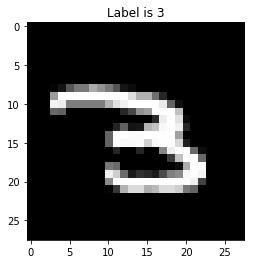

In [0]:
showData(x_train[250], y_train[250])

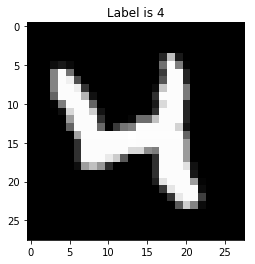

In [0]:
showData(x_train[20], y_train[20])

In [0]:
print(x_train[0].shape)

(28, 28)


In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18


## Normalization

---

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values


In [0]:
x_train_norm= x_train / 255.
x_test_norm=x_test / 255.
print(x_train_norm[0].shape)

(28, 28)


In [0]:
print(x_train_norm[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:


x_train_norm_mean_zero= x_train / 127.5 - 1.
x_test_norm_mean_zero=x_test / 127.5 - 1.

print(x_train_norm_mean_zero[0].shape)

(28, 28)


In [0]:
print(x_train_norm_mean_zero[0])

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

In [0]:
def preprocess_labels(y):
    labels = np_utils.to_categorical(y)
    return labels

In [0]:
y_train = preprocess_labels(y_train)
y_test = preprocess_labels(y_test)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], 28, 28, 1)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], 28, 28, 1)

x_train_norm_mean_zero = x_train_norm_mean_zero.reshape(x_train_norm_mean_zero.shape[0], 28, 28, 1)
x_test_norm_mean_zero = x_test_norm_mean_zero.reshape(x_test_norm_mean_zero.shape[0], 28, 28, 1)

print("number of training examples = " + str(x_train.shape[0]))
print("number of test examples = " + str(x_test.shape[0]))
print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [0]:
def keras_model(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list



In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

W0720 19:20:25.590551 140665148557184 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Trai

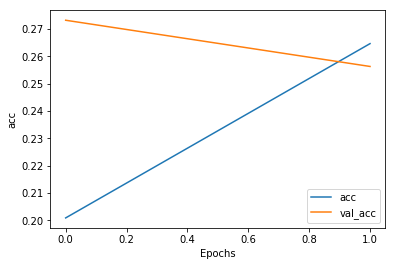

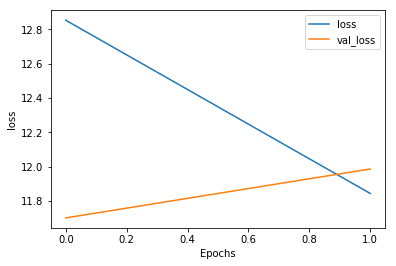

In [0]:
model, callbacks_list = keras_model(28, 28)
print_summary(model)
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=64,
              callbacks=callbacks_list)
plot_graphs(history, "acc")
plot_graphs(history, "loss")
K.clear_session()

In [0]:
model, callbacks_list = keras_model(28, 28)
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 71us/step - loss: 0.4736 - acc: 0.8552 - val_loss: 0.1533 - val_acc: 0.9525

Epoch 00001: val_acc improved from -inf to 0.95250, saving model to mnist_odsc.h5


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 74us/step - loss: 0.8028 - acc: 0.7462 - val_loss: 0.2881 - val_acc: 0.9138

Epoch 00001: val_acc improved from -inf to 0.91380, saving model to mnist_odsc.h5
Epoch 2/2
60000/60000 [==============================] - 4s 65us/step - loss: 0.4910 - acc: 0.8555 - val_loss: 0.2204 - val_acc: 0.9366

Epoch 00002: val_acc improved from 0.91380 to 0.93660, saving model to mnist_odsc.h5


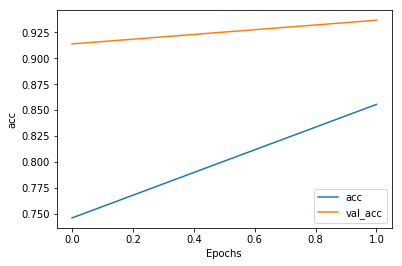

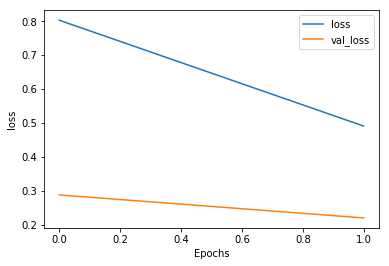

In [0]:
model, callbacks_list = keras_model(28, 28)
history=model.fit(x_train_norm_mean_zero, y_train, validation_data=(x_test_norm_mean_zero, y_test), epochs=2, batch_size=64,
              callbacks=callbacks_list)
plot_graphs(history, "acc")
plot_graphs(history, "loss")
K.clear_session()

## Optimizers
Let's check out different optimizers and the time taken by them.

In [0]:
 def keras_model_new(image_x, image_y, optim):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_sgd, callbacks_list = keras_model_new(28, 28,'sgd')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 59us/step - loss: 1.3513 - acc: 0.5484 - val_loss: 0.5190 - val_acc: 0.8765

Epoch 00001: val_acc improved from -inf to 0.87650, saving model to mnist_odsc.h5


In [0]:
model_sgd, callbacks_list = keras_model_new(28, 28,'rmsprop')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 64us/step - loss: 0.4773 - acc: 0.8562 - val_loss: 0.1609 - val_acc: 0.9521

Epoch 00001: val_acc improved from -inf to 0.95210, saving model to mnist_odsc.h5


In [0]:
model_sgd, callbacks_list = keras_model_new(28, 28,'adagrad')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 63us/step - loss: 0.4653 - acc: 0.8612 - val_loss: 0.1773 - val_acc: 0.9482

Epoch 00001: val_acc improved from -inf to 0.94820, saving model to mnist_odsc.h5


In [0]:
model_sgd, callbacks_list = keras_model_new(28, 28,'adadelta')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 74us/step - loss: 0.5052 - acc: 0.8446 - val_loss: 0.1801 - val_acc: 0.9461

Epoch 00001: val_acc improved from -inf to 0.94610, saving model to mnist_odsc.h5


In [0]:
model_sgd, callbacks_list = keras_model_new(28, 28,'adam')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 72us/step - loss: 0.4729 - acc: 0.8539 - val_loss: 0.1540 - val_acc: 0.9531

Epoch 00001: val_acc improved from -inf to 0.95310, saving model to mnist_odsc.h5


In [0]:
model_sgd, callbacks_list = keras_model_new(28, 28,'adamax')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 68us/step - loss: 0.5579 - acc: 0.8278 - val_loss: 0.1953 - val_acc: 0.9411

Epoch 00001: val_acc improved from -inf to 0.94110, saving model to mnist_odsc.h5


In [0]:
model_sgd, callbacks_list = keras_model_new(28, 28,'nadam')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 5s 80us/step - loss: 0.4350 - acc: 0.8690 - val_loss: 0.1482 - val_acc: 0.9552

Epoch 00001: val_acc improved from -inf to 0.95520, saving model to mnist_odsc.h5


## Activation

In [0]:
 def keras_model_active(image_x, image_y, activation):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512, activation=activation))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation=activation))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu, callbacks_list = keras_model_active(28, 28,'relu')
model_relu.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

W0615 12:34:08.006299 140504615327616 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 64us/step - loss: 0.4606 - acc: 0.8621 - val_loss: 0.1788 - val_acc: 0.9481

Epoch 00001: val_acc improved from -inf to 0.94810, saving model to mnist_odsc.h5


In [0]:
import keras.layers
model_sgd, callbacks_list = keras_model_active(28, 28,'tanh')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 59us/step - loss: 0.4839 - acc: 0.8518 - val_loss: 0.2462 - val_acc: 0.9285

Epoch 00001: val_acc improved from -inf to 0.92850, saving model to mnist_odsc.h5


In [0]:
model_sgd, callbacks_list = keras_model_active(28, 28,'sigmoid')
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 61us/step - loss: 0.6893 - acc: 0.7914 - val_loss: 0.3187 - val_acc: 0.9094

Epoch 00001: val_acc improved from -inf to 0.90940, saving model to mnist_odsc.h5


### Advanced Activation 

In [0]:
 def keras_model_adv_active(image_x, image_y, activation):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512))
    act = activation()
    model.add(act)
    model.add(Dropout(0.6))
    model.add(Dense(128))
    model.add(act)
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.layers.advanced_activations import LeakyReLU
model_sgd, callbacks_list = keras_model_adv_active(28, 28,LeakyReLU)
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 62us/step - loss: 0.4408 - acc: 0.8673 - val_loss: 0.2186 - val_acc: 0.9361

Epoch 00001: val_acc improved from -inf to 0.93610, saving model to mnist_odsc.h5


In [0]:
from keras.layers.advanced_activations import ELU
model_sgd, callbacks_list = keras_model_adv_active(28, 28,ELU)
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 61us/step - loss: 0.4975 - acc: 0.8514 - val_loss: 0.2334 - val_acc: 0.9300

Epoch 00001: val_acc improved from -inf to 0.93000, saving model to mnist_odsc.h5


In [0]:
from keras.layers.advanced_activations import ThresholdedReLU
model_sgd, callbacks_list = keras_model_adv_active(28, 28,ThresholdedReLU)
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 63us/step - loss: 1.7269 - acc: 0.3742 - val_loss: 1.3500 - val_acc: 0.5676

Epoch 00001: val_acc improved from -inf to 0.56760, saving model to mnist_odsc.h5


In [0]:
import tensorflow as tf
def focal_loss(gamma=2., alpha=.25):
  def focal_loss_fixed(y_true, y_pred):
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
  return focal_loss_fixed

### Focal Loss instead categorical loss

In [0]:
 def keras_model_focal_loss(image_x, image_y, activation):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512))
    act = activation()
    model.add(act)
    model.add(Dropout(0.6))
    model.add(Dense(128))
    model.add(act)
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss=[focal_loss(alpha=.25, gamma=2)], optimizer='adagrad', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.layers.advanced_activations import LeakyReLU
model_sgd, callbacks_list = keras_model_focal_loss(28, 28,LeakyReLU)
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 4s 59us/step - loss: 6.9224 - acc: 0.8410 - val_loss: 2.9756 - val_acc: 0.9299

Epoch 00001: val_acc improved from -inf to 0.92990, saving model to mnist_odsc.h5


### Experimenting with Adam

In [0]:
def keras_model_adam(image_x, image_y, activation,optimizer):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512))
    act = activation()
    model.add(act)
    model.add(Dropout(0.6))
    model.add(Dense(128))
    model.add(act)
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
class SGDLearningRateTracker(Callback):
    def on_batch_end(self, batch, logs=None):
        optimizer = self.model.optimizer
        lr=K.eval(optimizer.lr*(1./tf.cast(optimizer.iterations, tf.float32)))
        if K.eval(optimizer.iterations)%100==0:
          print('\n Iteration {} LR: {:.6f} \n'.format(K.eval(optimizer.iterations),lr))

In [0]:
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

optimizer=Adam(lr=0.001)

model_sgd, callbacks_list = keras_model_adam(28, 28,LeakyReLU,optimizer)
model_sgd.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=[SGDLearningRateTracker()])
K.clear_session()
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 6336/60000 [==>...........................] - ETA: 33s - loss: 0.9837 - acc: 0.6829
 Iteration 100 LR: 0.000010 

12800/60000 [=====>........................] - ETA: 31s - loss: 0.7582 - acc: 0.7592
 Iteration 200 LR: 0.000005 

19200/60000 [========>.....................] - ETA: 33s - loss: 0.6588 - acc: 0.7939
 Iteration 300 LR: 0.000003 

25600/60000 [===========>..................] - ETA: 33s - loss: 0.6033 - acc: 0.8131
 Iteration 400 LR: 0.000003 

32000/60000 [===============>..............] - ETA: 30s - loss: 0.5582 - acc: 0.8275
 Iteration 500 LR: 0.000002 

38400/60000 [==================>...........] - ETA: 25s - loss: 0.5311 - acc: 0.8374
 Iteration 600 LR: 0.000002 

44800/60000 [=====================>........] - ETA: 18s - loss: 0.5105 - acc: 0.8447
 Iteration 700 LR: 0.000001 

51200/60000 [========================>.....] - ETA: 11s - loss: 0.4896 - acc: 0.8509
 Iteration 800 LR: 0.000001 

57600/60000 [=======

## Network Architecture optimization

In [0]:
# Let's go for CIFAR 100
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
def showCifarData(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((32, 32,3))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

170500096/170498071 [==============================] - 6s 0us/step


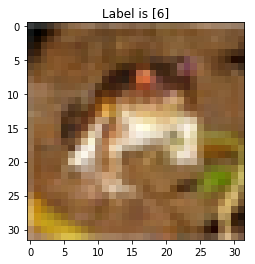

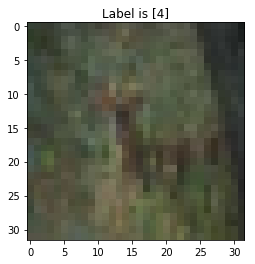

In [0]:
showCifarData(x_train[0],y_train[0])
showCifarData(x_train[10],y_train[10])


In [0]:
y_train = preprocess_labels(y_train)
y_test = preprocess_labels(y_test)
print("number of training examples = " + str(x_train.shape[0]))
print("number of test examples = " + str(x_test.shape[0]))
print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)


In [0]:
def keras_model_cifar(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 3)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [0]:
model, callbacks_list = keras_model_cifar(32, 32)
print_summary(model)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [0]:
from keras.layers import Conv2D, MaxPooling2D
def keras_model_cifar_conv(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x, image_y, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [0]:
model, callbacks_list = keras_model_cifar_conv(32, 32)
print_summary(model)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

W0720 19:31:40.662724 140665148557184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

## Autopilot research paper by NVIDIA

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1PZWa6H0i1PCH9zuYcIh5Ouk_p-9Gh58B',
                                    dest_path='/content/drive.zip',
                                    unzip=True)

In [0]:
!du -sh /content/drive.zip

2.9G	/content/drive.zip


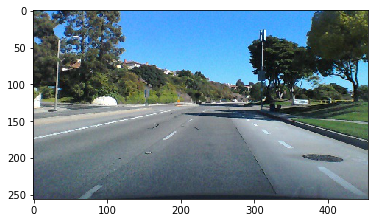

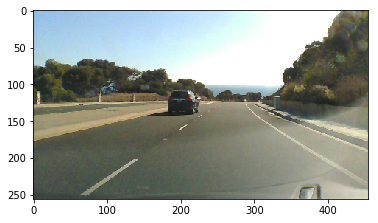

In [0]:
import matplotlib.pyplot as plt
def showData(x, label):
    img = plt.imread(x)
    pixels = np.array(img, dtype='uint8')

    pixels = pixels.reshape((256, 455,3))

    plt.imshow(pixels, cmap='gray')
    plt.show()
showData("/content/data/500.jpg",1)
showData("/content/data/4050.jpg",1)

In [0]:
from keras.layers import BatchNormalization,Input
from keras.layers.convolutional import Convolution2D
import tensorflow as tf
from keras.models import Model

def atan(x):
    return tf.atan(x)
  
#Lets look at the model for the original research paper

def paper_model():
    inputs = Input(shape=(66, 200, 3))
    conv_1 = Convolution2D(24, 5, 5, activation='relu', name='conv_1', subsample=(2, 2))(inputs)
    conv_2 = Convolution2D(36, 5, 5, activation='relu', name='conv_2', subsample=(2, 2))(conv_1)
    conv_3 = Convolution2D(48, 5, 5, activation='relu', name='conv_3', subsample=(2, 2))(conv_2)
    conv_3 = Dropout(.5)(conv_3)

    conv_4 = Convolution2D(64, 3, 3, activation='relu', name='conv_4', subsample=(1, 1))(conv_3)
    conv_5 = Convolution2D(64, 3, 3, activation='relu', name='conv_5', subsample=(1, 1))(conv_4)

    flat = Flatten()(conv_5)

    dense_1 = Dense(1164)(flat)
    dense_1 = Dropout(.5)(flat)
    dense_2 = Dense(100, activation='relu')(dense_1)
    dense_2 = Dropout(.5)(flat)
    dense_3 = Dense(50, activation='relu')(dense_2)
    dense_3 = Dropout(.5)(flat)
    dense_4 = Dense(10, activation='relu')(dense_3)
    dense_4 = Dropout(.5)(flat)

    final = Dense(1, activation=atan)(dense_4)
    model = Model(input=inputs, output=final)
    
    return model
print_summary(paper_model())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 66, 200, 3)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 47, 36)        21636     
_________________________________________________________________
conv_3 (Conv2D)              (None, 5, 22, 48)         43248     
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 22, 48)         0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 3, 20, 64)         27712     
_________________________________________________________________
conv_5 (Conv2D)              (None, 1, 18, 64)         36928     
__________

In [0]:
from __future__ import division
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

def preprocess(img):
    resized = cv2.resize(img, (200 ,200))
    return resized
 

def return_data():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to avoid rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(preprocess(img))
        if (i%10000==0):
          print("Images loaded ----> "+str(len(features)))
          printm()
        
    print("preprocessing done")
    feature = np.array(features).astype('float32')
    label = np.array(y).astype('float32')

return_data()

Images loaded ----> 1
Gen RAM used: 446.3 MB
Images loaded ----> 10001
Gen RAM used: 1.9 GB
Images loaded ----> 20001
Gen RAM used: 3.4 GB
Images loaded ----> 30001
Gen RAM used: 4.9 GB
Images loaded ----> 40001
Gen RAM used: 6.3 GB
Images loaded ----> 50001
Gen RAM used: 7.7 GB
Images loaded ----> 60001
Gen RAM used: 8.7 GB
preprocessing done


### How to handle out of memory issue

Couple of ways to do this.


*   Scaling the image - The original size of the images is (256, 455,3). Can we crop it ?
*   Removing channels - Instead of using all the colors, can we use black and white image?
*   Applying filters - Apply filters which would make it easier for 
*   Using fir_generator :  fit_generator function to yield images at runtime.



In [0]:
# Scaling Images (Scaled to 50,50,3)
from __future__ import division
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

def preprocess(img):
    resized = cv2.resize(img, (50 ,50))
    return resized
 

def return_data():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to avoid rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(preprocess(img))
        if (i%10000==0):
          print("Images loaded ----> "+str(len(features)))
          printm()
        
    print("preprocessing done")
    features = np.array(features).astype('float32')
    labels = np.array(y).astype('float32')
    with open("features", "wb") as f:
        pickle.dump(features, f, protocol=4)
    with open("labels", "wb") as f:
        pickle.dump(labels, f, protocol=4)

return_data()

Images loaded ----> 1
Gen RAM used: 598.3 MB
Images loaded ----> 10001
Gen RAM used: 681.9 MB
Images loaded ----> 20001
Gen RAM used: 764.6 MB
Images loaded ----> 30001
Gen RAM used: 848.8 MB
Images loaded ----> 40001
Gen RAM used: 932.3 MB
Images loaded ----> 50001
Gen RAM used: 1.0 GB
Images loaded ----> 60001
Gen RAM used: 1.1 GB
preprocessing done


#### Scaling Image

In [0]:
#model for 50,50,3

def loadFromPickle():
    with open("features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels
  
features, labels = loadFromPickle()
features, labels = shuffle(features, labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,
                                                    test_size=0.3)
train_x = train_x.reshape(train_x.shape[0], 50, 50, 3)
test_x = test_x.reshape(test_x.shape[0], 50, 50, 3)

def keras_model(image_x, image_y):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(image_x, image_y, 3)))
    model.add(Conv2D(32, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2), padding='valid'))

    model.add(Conv2D(32, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))


    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Dense(10))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mse")
    filepath = "Autopilot.h5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    return model, callbacks_list

model, callbacks_list = keras_model(50, 50)
print_summary(model)

model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=3, batch_size=32,
              callbacks=callbacks_list)

W0713 11:49:13.452569 139963300562816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 11:49:13.514982 139963300562816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 11:49:13.542726 139963300562816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 11:49:13.582391 139963300562816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 11:49:13.625212 139963300562816 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        25632     
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
__________

W0713 11:49:13.992944 139963300562816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 44677 samples, validate on 19148 samples
Epoch 1/3
44677/44677 [==============================] - 28s 627us/step - loss: 0.2121 - val_loss: 0.2024

Epoch 00001: val_loss improved from inf to 0.20237, saving model to Autopilot.h5
Epoch 2/3
44677/44677 [==============================] - 21s 475us/step - loss: 0.1924 - val_loss: 0.1776

Epoch 00002: val_loss improved from 0.20237 to 0.17759, saving model to Autopilot.h5
Epoch 3/3
44677/44677 [==============================] - 21s 476us/step - loss: 0.1776 - val_loss: 0.1565

Epoch 00003: val_loss improved from 0.17759 to 0.15653, saving model to Autopilot.h5


#### Adding filters and Splitting channels

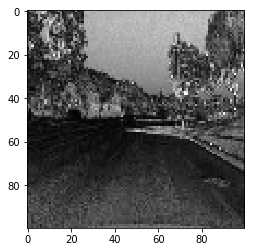

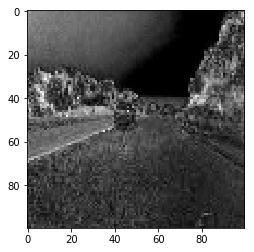

In [0]:
def preprocess_HSV(img):
    resized = cv2.resize((cv2.cvtColor(img, cv2.COLOR_RGB2HSV))[:, :, 1], (100, 100))
    return resized
  
def showData_HSV(x, label):
    img = plt.imread(x)
    img=preprocess_HSV(img)
    pixels = np.array(img, dtype='uint8')
    pixels = pixels.reshape((100, 100))

    plt.imshow(pixels, cmap='gray')
    plt.show()

showData_HSV("/content/data/500.jpg",1)
showData_HSV("/content/data/4050.jpg",1)

In [0]:
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')
 

def return_data_HSV():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to avoid rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(preprocess_HSV(img))
        if (i%10000==0):
          print("Images loaded ----> "+str(len(features)))
          printm()
        
    print("preprocessing done")
    features = np.array(features).astype('float32')
    labels = np.array(y).astype('float32')
    with open("features_HSV", "wb") as f:
        pickle.dump(features, f, protocol=4)
    with open("labels_HSV", "wb") as f:
        pickle.dump(labels, f, protocol=4)

return_data_HSV()

Images loaded ----> 1
Gen RAM used: 604.3 MB
Images loaded ----> 10001
Gen RAM used: 713.3 MB
Images loaded ----> 20001
Gen RAM used: 823.6 MB
Images loaded ----> 30001
Gen RAM used: 938.7 MB
Images loaded ----> 40001
Gen RAM used: 1.0 GB
Images loaded ----> 50001
Gen RAM used: 1.2 GB
Images loaded ----> 60001
Gen RAM used: 1.3 GB
preprocessing done


In [0]:
def loadFromPickle_HSV():
    with open("features_HSV", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels_HSV", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels
  
features, labels = loadFromPickle_HSV()
features, labels = shuffle(features, labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,
                                                    test_size=0.3)
train_x = train_x.reshape(train_x.shape[0], 100, 100, 1)
test_x = test_x.reshape(test_x.shape[0], 100, 100, 1)

def showLoadedData_HSV_100(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((100, 100))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
showLoadedData_HSV_100(train_x[0],train_y[0])
def keras_model(image_x, image_y):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(image_x, image_y, 1)))
    model.add(Conv2D(16, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))

    model.add(Conv2D(32, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))


    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Dense(10))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mse")
    filepath = "Autopilot.h5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    return model, callbacks_list
  
  
model, callbacks_list = keras_model(100, 100)
print_summary(model)
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=3, batch_size=32,
              callbacks=callbacks_list)

W0713 12:09:25.593295 140246326757248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 12:09:25.630656 140246326757248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 12:09:25.648759 140246326757248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 12:09:25.684921 140246326757248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 12:09:25.724577 140246326757248 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        12832     
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
__________

W0713 12:09:26.079302 140246326757248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 44677 samples, validate on 19148 samples
Epoch 1/3
44677/44677 [==============================] - 38s 844us/step - loss: 0.2093 - val_loss: 0.1825

Epoch 00001: val_loss improved from inf to 0.18253, saving model to Autopilot.h5
Epoch 2/3
44677/44677 [==============================] - 31s 702us/step - loss: 0.1692 - val_loss: 0.1520

Epoch 00002: val_loss improved from 0.18253 to 0.15203, saving model to Autopilot.h5
Epoch 3/3
44677/44677 [==============================] - 31s 697us/step - loss: 0.1571 - val_loss: 0.1402

Epoch 00003: val_loss improved from 0.15203 to 0.14025, saving model to Autopilot.h5


#### Fit Generator

In [0]:
from __future__ import division
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

def preprocess(img):
    resized = cv2.resize(img, (200 ,200))
    return resized
  
def generator_from_path(directory, batch_size):
  X,y=return_data()
  print("Getting X,y")
  batch_features = np.zeros((batch_size, 200, 200, 3))
  batch_labels = np.zeros((batch_size,1))

  while True:
      for i in range(batch_size):
         # choose random index in features
          index= random.randint(0,len(X)-1)
          if index %1000 ==0:
            print(index)
          img = plt.imread(X[index])
          batch_features[i] = preprocess(img)
          batch_labels[i] = y[index]
          yield batch_features, batch_labels

def return_data():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to avoid rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)
    return X,y

  
def keras_model(image_x, image_y):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(image_x, image_y, 3)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(256))
    model.add(Dense(64))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mse")
    filepath = "/tmp/Autopilot_gen.h5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    return model, callbacks_list
  
model, callbacks_list = keras_model(200, 200)
print_summary(model)

class MemTracker(Callback):
    def on_epoch_end(self, batch, logs=None):
       printm()

model.fit_generator(generator_from_path('/content/',128),
        samples_per_epoch=32, nb_epoch=3, callbacks=[MemTracker()], shuffle=True, use_multiprocessing=True)

model.save('/content/Autopilot_gen.h5')

W0713 12:37:31.357231 139778993051520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 12:37:31.378344 139778993051520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 12:37:31.393085 139778993051520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 12:37:31.413348 139778993051520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 12:37:31.479223 139778993051520 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
__________

W0713 12:37:31.841116 139778993051520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/3
Getting X,y
32/32 [==============================] - 18s 561ms/step - loss: 16.8473
Gen RAM used: 4.0 GB
Epoch 2/3
32/32 [==============================] - 11s 341ms/step - loss: 0.0228
Gen RAM used: 4.0 GB
Epoch 3/3
32/32 [==============================] - 11s 342ms/step - loss: 0.0264
Gen RAM used: 4.0 GB


## Emojinator

In [0]:
#get images from google drive
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1io1YDRrB6uuvz4AlFNtqEYVrwze5fBgA',
                                    dest_path='/content/emojinator_data.zip',
                                    unzip=True)

Unzipping...Done.


In [0]:
import cv2
import numpy as np
import os

image_x, image_y = 50, 50
skin_lower=np.array([2, 50, 60])
skin_upper=np.array([25, 150, 255])

cap = cv2.VideoCapture(0)
fbag = cv2.createBackgroundSubtractorMOG2()

def create_folder(folder_name):
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)

def main(g_id):
    total_pics = 1200
    cap = cv2.VideoCapture(0)
    x, y, w, h = 300, 50, 350, 350

    create_folder("gestures/" + str(g_id))
    pic_no = 0
    flag_start_capturing = False
    frames = 0

    while True:
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        mask2 = cv2.inRange(hsv, skin_lower, skin_upper)
        res = cv2.bitwise_and(frame, frame, mask=mask2)
        gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        median = cv2.GaussianBlur(gray, (5, 5), 0)

        kernel_square = np.ones((5, 5), np.uint8)
        dilation = cv2.dilate(median, kernel_square, iterations=2)
        opening=cv2.morphologyEx(dilation,cv2.MORPH_CLOSE,kernel_square)

        ret, thresh = cv2.threshold(opening, 30, 255, cv2.THRESH_BINARY)
        thresh = thresh[y:y + h, x:x + w]
        contours = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[1]

        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            if cv2.contourArea(contour) > 10000 and frames > 50:
                x1, y1, w1, h1 = cv2.boundingRect(contour)
                pic_no += 1
                save_img = thresh[y1:y1 + h1, x1:x1 + w1]
                if w1 > h1:
                    save_img = cv2.copyMakeBorder(save_img, int((w1 - h1) / 2), int((w1 - h1) / 2), 0, 0,
                                                  cv2.BORDER_CONSTANT, (0, 0, 0))
                elif h1 > w1:
                    save_img = cv2.copyMakeBorder(save_img, 0, 0, int((h1 - w1) / 2), int((h1 - w1) / 2),
                                                  cv2.BORDER_CONSTANT, (0, 0, 0))
                save_img = cv2.resize(save_img, (image_x, image_y))
                cv2.putText(frame, "Capturing...", (30, 60), cv2.FONT_HERSHEY_TRIPLEX, 2, (127, 255, 255))
                cv2.imwrite("gestures/" + str(g_id) + "/" + str(pic_no) + ".jpg", save_img)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, str(pic_no), (30, 400), cv2.FONT_HERSHEY_TRIPLEX, 1.5, (127, 127, 255))
        cv2.imshow("Capturing gesture", frame)
        cv2.imshow("thresh", thresh)
        keypress = cv2.waitKey(1)
        if keypress == ord('c'):
            if flag_start_capturing == False:
                flag_start_capturing = True
            else:
                flag_start_capturing = False
                frames = 0
        if flag_start_capturing == True:
            frames += 1
        if pic_no == total_pics:
            break


# g_id = input("Enter gesture number: ")
#main(g_id)

Enter gesture number: 1


### Image Augmentation with Keras ImageGenerator

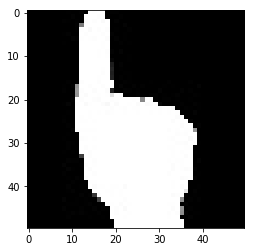

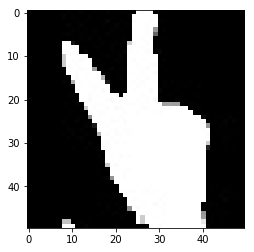

In [0]:
# showGestures
import matplotlib.pyplot as plt
def showData_Emo(x, label):
    img = plt.imread(x)
    pixels = np.array(img, dtype='uint8')

    pixels = pixels.reshape((50, 50))

    plt.imshow(pixels, cmap='gray')
    plt.show()
showData_Emo("/content/gestures/1/500.jpg",1)
showData_Emo("/content/gestures/2/200.jpg",1)

In [0]:
# Train model
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        width_shift_range=0.1,
         height_shift_range=0.1,
         zoom_range=[0.9, 1.25],
         vertical_flip=False,
         fill_mode='reflect',
        horizontal_flip=True)

image_gen = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
brightness_range=[0.5, 1.5])

train_generator = train_datagen.flow_from_directory(
        "/content/gestures/",
        target_size=(50, 50),
        color_mode="grayscale",
        batch_size=32,
        class_mode="categorical")

def keras_model(image_x, image_y):
    num_of_classes = 12
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x, image_y, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "emojinator.h5"
    checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint1]

    return model, callbacks_list

image_x=50
image_y=50
class MemTracker(Callback):
  def on_epoch_end(self, batch, logs=None):
     printm()
model, callbacks_list = keras_model(image_x, image_y)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=5,callbacks=[MemTracker()], shuffle=True, use_multiprocessing=True)

W0807 15:36:53.904050 139832366593920 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Found 14400 images belonging to 12 classes.
Epoch 1/5
450/450 [==============================] - 13s 30ms/step - loss: 0.7968 - acc: 0.7422
Gen RAM used: 2.6 GB
Epoch 2/5
450/450 [==============================] - 10s 23ms/step - loss: 0.0909 - acc: 0.9743
Gen RAM used: 2.6 GB
Epoch 3/5
450/450 [==============================] - 10s 23ms/step - loss: 0.0498 - acc: 0.9847
Gen RAM used: 2.6 GB
Epoch 4/5
450/450 [==============================] - 11s 24ms/step - loss: 0.0348 - acc: 0.9894
Gen RAM used: 2.6 GB
Epoch 5/5
450/450 [==============================] - 11s 24ms/step - loss: 0.0302 - acc: 0.9912
Gen RAM used: 2.6 GB


In [0]:
print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

KeyError: ignored

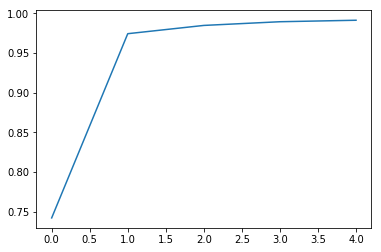

In [0]:
plot_graphs(history, "acc")


KeyError: ignored

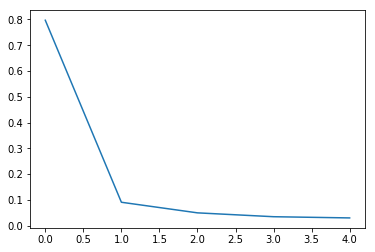

In [0]:
plot_graphs(history, "loss")

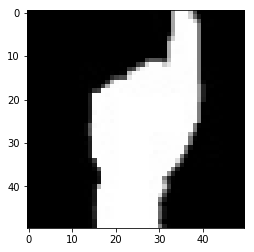

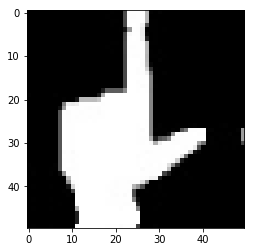

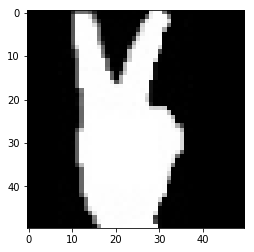

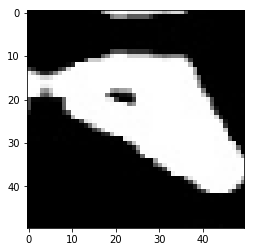

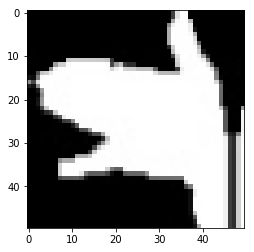

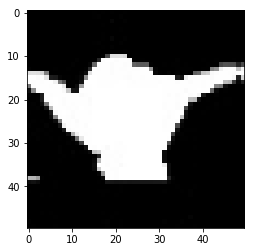

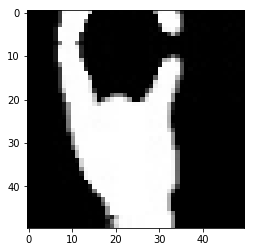

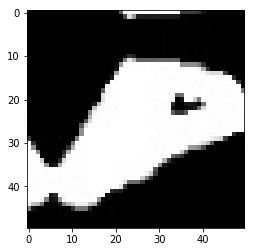

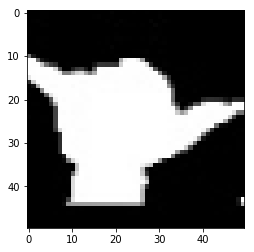

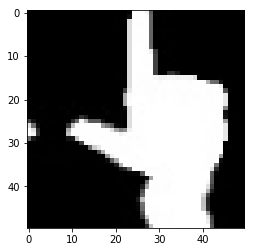

In [0]:
x,y = train_generator.next()
# print(x)
for i in range(0,10):
    img = x[i]*255
    pixels = np.array(img, dtype='uint8')

    pixels = pixels.reshape((50, 50))

    plt.imshow(pixels, cmap='gray')
    plt.show()

## Malaria Detection

In [0]:
#get images from google drive
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1gwVCKzmqbpgtDNA9rP8veeiakEl-4PTB',
                                    dest_path='/content/Malaria_data.zip',
                                    unzip=True)


Unzipping...Done.


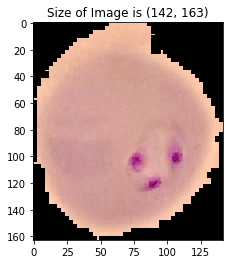

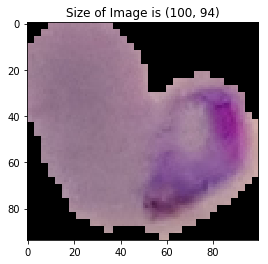

In [0]:
def showMalariaData(x):
    image = Image.open(x)
    plt.imshow(np.asarray(image), cmap='gray')
    plt.title('Size of Image is {label}'.format(label=image.size))
    plt.show()

#Malaria cells
showMalariaData("/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png")
showMalariaData("/content/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_6.png")

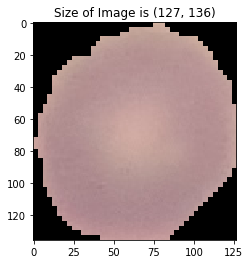

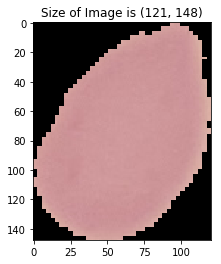

In [0]:
#Normal cell images
showMalariaData("/content/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_60.png")
showMalariaData("/content/cell_images/Uninfected/C122P83ThinF_IMG_20151002_145014_cell_158.png")

### Image processing filters

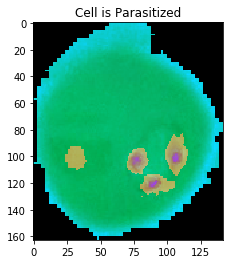

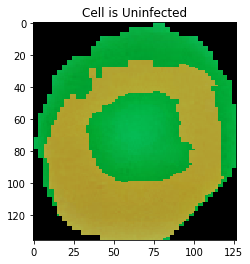

In [0]:
def showMalariaFiltered_HLS_Data(x,label):
    image = Image.open(x)
    image=np.asarray(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    plt.title('Cell is {label}'.format(label=label))
    plt.imshow(hsv, cmap='gray')
    plt.show()
    
showMalariaFiltered_HLS_Data("/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png","Parasitized")
showMalariaFiltered_HLS_Data("/content/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_60.png","Uninfected")


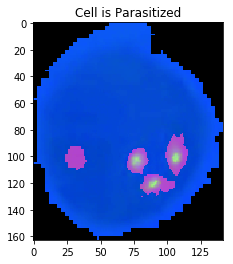

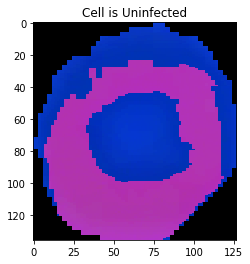

In [0]:
def showMalariaFiltered_HSV_Data(x,label):
    image = Image.open(x)
    image=np.asarray(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    plt.title('Cell is {label}'.format(label=label))
    plt.imshow(hsv, cmap='gray')
    plt.show()
    
showMalariaFiltered_HSV_Data("/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png","Parasitized")
showMalariaFiltered_HSV_Data("/content/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_60.png","Uninfected")

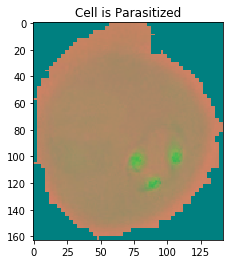

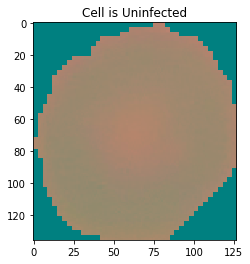

In [0]:
def showMalariaFiltered_LAB_Data(x,label):
    image = Image.open(x)
    image=np.asarray(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    plt.title('Cell is {label}'.format(label=label))
    plt.imshow(hsv, cmap='gray')
    plt.show()
    
showMalariaFiltered_LAB_Data("/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png","Parasitized")
showMalariaFiltered_LAB_Data("/content/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_60.png","Uninfected")

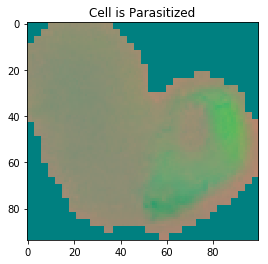

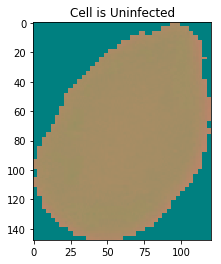

In [0]:
showMalariaFiltered_LAB_Data("/content/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_6.png","Parasitized")
showMalariaFiltered_LAB_Data("/content/cell_images/Uninfected/C122P83ThinF_IMG_20151002_145014_cell_158.png","Uninfected")

In [0]:
# Train model


train_datagen_malaria = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        width_shift_range=0.1,
         height_shift_range=0.1,
         zoom_range=[0.9, 1.25],
         vertical_flip=False,
         fill_mode='reflect',
        horizontal_flip=True)

train_generator = train_datagen_malaria.flow_from_directory(
        "/content/cell_images/",
        color_mode="rgb",
        target_size=(256, 256),
        batch_size=32,
        class_mode="binary")

def keras_model(image_x, image_y):
    num_of_classes = 1
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x, image_y, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "emojinator.h5"
    checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint1]

    return model, callbacks_list

class MemTracker(Callback):
  def on_epoch_end(self, batch, logs=None):
     printm()
model, callbacks_list = keras_model(256, 256)
print_summary(model)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=5,callbacks=[MemTracker()], shuffle=True, use_multiprocessing=True)

Found 27558 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              40961024  
_________________________________________________________________
dropout_8 (Dropout)          (Non

Process ForkPoolWorker-10:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py", line 626, in next_sample
    return six.next(_SHARED_SEQUENCES[uid])
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 104, in __next__
    return self.next(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 116, in next
    return self._get_batches_of_transformed_samples(index_array)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 230, in _get_batches_of_transformed_samples
    interpolat

Epoch 1/5


KeyboardInterrupt: ignored

In [0]:
# Train model

def myFunc(image):
#   image = Image.open(x)
  image=np.asarray(image)
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  return np.array(hsv) 
  

train_datagen_malaria = ImageDataGenerator(
        preprocessing_function=myFunc,
        rescale=1./255,
        shear_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=[0.9, 1.25],
        vertical_flip=False,
        fill_mode='reflect',
        horizontal_flip=True)

train_generator = train_datagen_malaria.flow_from_directory(
        "/content/cell_images/",
        color_mode="rgb",
        target_size=(256, 256),
        batch_size=32,
        class_mode="binary")

def keras_model(image_x, image_y):
    num_of_classes = 1
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x, image_y, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "emojinator.h5"
    checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint1]

    return model, callbacks_list

class MemTracker(Callback):
  def on_epoch_end(self, batch, logs=None):
     printm()
model, callbacks_list = keras_model(256, 256)
print_summary(model)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=5,callbacks=[MemTracker()], shuffle=True, use_multiprocessing=True)



Found 27558 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 40000)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              40961024  
_________________________________________________________________
dropout_20 (Dropout)         (Non

Process ForkPoolWorker-17:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 347, in put
    self._writer.send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 398, in _send_bytes
    self._send(buf)


KeyboardInterrupt: ignored

  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
KeyboardInterrupt


## TensorFlow model optimization

### Magnitude-based weight pruning with Keras

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [0]:
K.clear_session()

In [0]:
import tensorflow as tf
def keras_model(image_x, image_y):
    num_of_classes = 10
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (5, 5), input_shape=(image_x, image_y, 1), activation='relu', padding="same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding="same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding="same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(tf.keras.layers.Conv2D(256, (5, 5), activation='relu', padding="same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.6))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.6))
    model.add(tf.keras.layers.Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_tf_odsc.h5"
    checkpoint1 = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
                                                     mode='max')
    callbacks_list = [checkpoint1]

    return model, callbacks_list

In [0]:
model, callbacks_list = keras_model(28, 28)
print_summary(model)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 256)         819456    
__________

KeyboardInterrupt: ignored

In [0]:
! pip install tensorflow-model-optimization

from tensorflow_model_optimization.sparsity import keras as sparsity

epochs = 2
end_step = np.ceil(1.0 * 60000 / 64).astype(np.int32) * epochs
print(end_step)

loaded_model = tf.keras.models.load_model('mnist_tf_odsc.h5')
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=100)
}

pruned_model = sparsity.prune_low_magnitude(loaded_model, **pruning_params)
pruned_model.summary()

pruned_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])

1876
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d ( (None, 28, 28, 32)        1634      
_________________________________________________________________
prune_low_magnitude_max_pool (None, 14, 14, 32)        1         
_________________________________________________________________
prune_low_magnitude_conv2d_1 (None, 14, 14, 64)        102466    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 7, 7, 64)          1         
_________________________________________________________________
prune_low_magnitude_conv2d_2 (None, 7, 7, 128)         409730    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 3, 128)         1         
_________________________________________________________________
prune_low_magnitude_conv2d_3 (None, 3, 3, 256)     

In [0]:


logdir='logs/'
batch_size=32


# Add a pruning step callback to peg the pruning step to the optimizer's
# step. Also add a callback to add pruning summaries to tensorboard
callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0)
]

pruned_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          verbose=1,
          callbacks=callbacks,
          validation_data=(x_test, y_test))

score = pruned_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 26s 436us/sample - loss: 0.0807 - acc: 0.9798 - val_loss: 0.0389 - val_acc: 0.9874
Epoch 2/2
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0470 - acc: 0.9879 - val_loss: 0.0333 - val_acc: 0.9890
Test loss: 0.030871632472357306
Test accuracy: 0.9896


In [0]:
import tempfile

_, checkpoint_file = tempfile.mkstemp('.h5')
print('Saving pruned model to: ', checkpoint_file)
# saved_model() sets include_optimizer to True by default. Spelling it out here
# to highlight.
tf.keras.models.save_model(pruned_model, checkpoint_file, include_optimizer=True)

with sparsity.prune_scope():
  restored_model = tf.keras.models.load_model(checkpoint_file)

restored_model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=2,
                   verbose=1,
                   callbacks=callbacks,
                   validation_data=(x_test, y_test))

score = restored_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Saving pruned model to:  /tmp/tmp4j85pdd8.h5
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 27s 450us/sample - loss: 0.0368 - acc: 0.9905 - val_loss: 0.0312 - val_acc: 0.9911
Epoch 2/2
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0311 - acc: 0.9916 - val_loss: 0.0360 - val_acc: 0.9897
Test loss: 0.03737978271520169
Test accuracy: 0.9899


In [0]:
final_model = sparsity.strip_pruning(pruned_model)
final_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         8

In [0]:
_, pruned_keras_file = tempfile.mkstemp('.h5')
print('Saving pruned model to: ', pruned_keras_file)

# No need to save the optimizer with the graph for serving.
tf.keras.models.save_model(final_model, pruned_keras_file, include_optimizer=False)

Saving pruned model to:  /tmp/tmpbunbhy7r.h5


In [0]:
from tensorflow.keras.models import load_model

model = load_model('/tmp/tmpbunbhy7r.h5')
import numpy as np

for i, w in enumerate(model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

W0707 14:41:15.697796 139655244191616 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


conv2d_18/kernel:0 -- Total:800, Zeros: 90.00%
conv2d_18/bias:0 -- Total:32, Zeros: 0.00%
conv2d_1_15/kernel:0 -- Total:51200, Zeros: 90.00%
conv2d_1_15/bias:0 -- Total:64, Zeros: 0.00%
conv2d_2_15/kernel:0 -- Total:204800, Zeros: 90.00%
conv2d_2_15/bias:0 -- Total:128, Zeros: 0.00%
conv2d_3_15/kernel:0 -- Total:819200, Zeros: 90.00%
conv2d_3_15/bias:0 -- Total:256, Zeros: 0.00%
dense_17/kernel:0 -- Total:262144, Zeros: 90.00%
dense_17/bias:0 -- Total:1024, Zeros: 0.00%
dense_1_15/kernel:0 -- Total:524288, Zeros: 90.00%
dense_1_15/bias:0 -- Total:512, Zeros: 0.00%
dense_2_15/kernel:0 -- Total:5120, Zeros: 90.00%
dense_2_15/bias:0 -- Total:10, Zeros: 0.00%


In [0]:
import zipfile
keras_file='/tmp/tmp4j85pdd8.h5'
_, zip1 = tempfile.mkstemp('.zip') 
with zipfile.ZipFile(zip1, 'w', compression=zipfile.ZIP_DEFLATED) as f:
  f.write(keras_file)
print("Size of the unpruned model before compression: %.2f Mb" % 
      (os.path.getsize(keras_file) / float(2**20)))
print("Size of the unpruned model after compression: %.2f Mb" % 
      (os.path.getsize(zip1) / float(2**20)))

_, zip2 = tempfile.mkstemp('.zip') 
with zipfile.ZipFile(zip2, 'w', compression=zipfile.ZIP_DEFLATED) as f:
  f.write(pruned_keras_file)
print("Size of the pruned model before compression: %.2f Mb" % 
      (os.path.getsize(pruned_keras_file) / float(2**20)))
print("Size of the pruned model after compression: %.2f Mb" % 
      (os.path.getsize(zip2) / float(2**20)))

Size of the unpruned model before compression: 28.62 Mb
Size of the unpruned model after compression: 11.02 Mb
Size of the pruned model before compression: 7.17 Mb
Size of the pruned model after compression: 1.37 Mb


## SignNet


In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/oPByHeKv3fw"></iframe>